<a href="https://colab.research.google.com/github/SubashKhatiwada11/Data-Science-project900-/blob/main/ads__data(project3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluating the model using one feature and multiple feature.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Dataset

In [ ]:
df = pd.read_csv("ads.csv")
df.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
unnamed_columns = [col for col in df.columns if 'Unnamed' in col] # Removing the redundant column
df.drop(columns=unnamed_columns, inplace=True)
print(df.head())




      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [ ]:
df.shape # dataset contains 200 rows and 4 columns

(200, 4)

In [ ]:
df.describe() # Summary Statistics of the data set

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isna().sum() # check for the missing values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
# There are no data missing in this dataset.

#Exploratory Data Analysis

In [ ]:
df.sales.value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

In [ ]:
df.sales.value_counts()/len(df)

9.7     0.025
11.7    0.020
12.9    0.020
15.9    0.020
20.7    0.015
        ...  
17.0    0.005
18.3    0.005
22.3    0.005
14.0    0.005
25.5    0.005
Name: sales, Length: 121, dtype: float64

In [ ]:
df.columns.tolist()

['TV', 'radio', 'newspaper', 'sales']

#Data Visualizations

# Relationship between TV radio newspaper and sales in pairplot

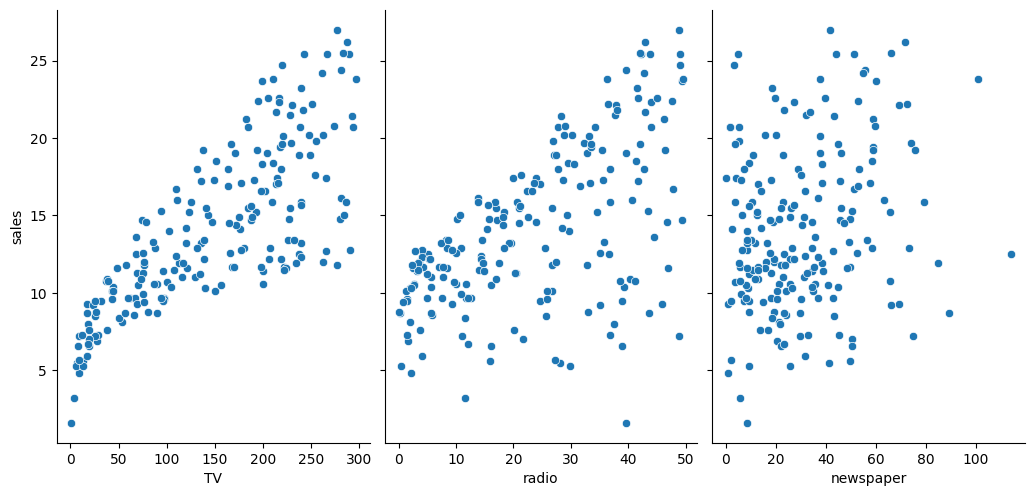

In [ ]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=5, aspect=0.7)

In [ ]:
sns.boxplot(data = df ,x = 'TV' , hue = 'sales' )

In [ ]:
# There is no any outliers in reference to (TV)

In [ ]:
sns.boxplot(data = df ,x = 'radio' , hue = 'sales' )


In [ ]:
# Even in the case of radio no outliers are present.

In [ ]:
sns.boxplot(data = df ,x = 'newspaper' , hue = 'sales' )


In [ ]:
# There we can see slight outliers but not considerable outliers even in the case of newspaper.

In [ ]:
sns.boxplot(df['sales']) # gives the boxplot of sales overall


In [ ]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
sns.heatmap(df.corr(), annot=True) # Let's see the correlation between different variables.


In [ ]:
# We can clealrly see TV is highly correlated with the value of 0.78.

In [ ]:
# We shall use TV as our independent variables.
# It is a way to select our feature variable.

In [ ]:
X = df[['TV']] # 2D tei vayera dataframe ma leko
y = df.sales # 1d ma chaincha so series

##Train-Test Split

#Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.
Train-Test Split
 It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42) # 0.2 means 20 % data test

In [ ]:
# Let's now take a look at the train dataset

In [ ]:
X_train.head()

,TV
79,116.0
197,177.0
38,43.1
24,62.3
122,224.0


In [ ]:
y_train.head()

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: sales, dtype: float64

In [ ]:
X_train.shape , y_train.shape # trained data shape


((160, 1), (160,))

In [ ]:
X_test.shape, y_test.shape


((40, 1), (40,))

#MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
m= model.coef_ # constant and slope
c = model.intercept_
print(f"m = {m}")
print(f"c = {c}")


m = [0.04652973]
c = 7.119638430592953


## Evaluation

In [ ]:
y_pred = model.predict(X_test)


Evaluating MSE , MAE  and r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score


In [ ]:
mean_squared_error(y_test, y_pred)


10.204654118800956

In [ ]:
mean_absolute_error(y_test, y_pred)


2.444420003751042

In [ ]:
r2_score(y_test ,y_pred)

0.6766954295627076

# Creating Model with multiple feature

In [ ]:
All_variables = ['TV','radio','newspaper']
X = df[All_variables]
y = df.sales
X_train, X_test, y_train, y_test = train_test_split(
    X ,y ,test_size = 0.2 ,random_state = 42)





In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [ ]:
m= model.coef_
c = model.intercept_
print(f"m = {m}")
print(f"c = {c}")


m = [0.04472952 0.18919505 0.00276111]
c = 2.979067338122629


In [ ]:
y_pred = model.predict(X_test)


# Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score


In [ ]:
mean_squared_error(y_test, y_pred)


3.1740973539761033

In [ ]:
mean_absolute_error(y_test, y_pred)


1.4607567168117603

In [ ]:
r2_score(y_test ,y_pred)


0.899438024100912

# Conclusion

This model(multiple) has a higher R-squared (0.89) than the previous model(0.67). This model provides a better fit to the data than a model that only includes TV.